# PCA: Principal Component Analysis (Intro)

### Definition

1. A PC is a linear combinaison of varibles
2. The scaled one unit-long-vector for a PC is called **singular vector** or **Eigenvector**
3. The proportion of each variable for one-unit vector are called **Loading score**
4. PCA call the sum of the squares distances for the line that best fit the data the **Eigenvalue for PC1**
5. SVD: Singular Value Decomposition
6. The **Scree plot** is a graphical representation of a percentage of variation that each PC accounts for
7. The proportion of variation that each PCs account for is given by the equation: 
   
   For $k$ PCs $$ ratio(PC_i) = {SSDistance(PC_i) \over \sum_{j=1}^{k}{SSDistance(PC_j)}} $$

### Make up data

In [12]:
import pandas as pd 
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale
import matplotlib.pyplot as plt

In [13]:
genes = ['gene' + str(i) for i in range(1, 101)]
wt = ['wild-type' + str(i) for i in range(1, 6)]
ko = ['knock-out' + str(i) for i in range(1, 6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
    data.loc[gene, 'wild-type1':'wild-type5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'knock-out1':'knock-out5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    
data.head()

,wild-type1,wild-type2,wild-type3,wild-type4,wild-type5,knock-out1,knock-out2,knock-out3,knock-out4,knock-out5
gene1,824,782,867,828,792,104,130,125,134,111
gene2,899,816,898,878,914,886,896,893,882,889
gene3,69,94,75,66,86,958,933,904,962,943
gene4,486,493,510,492,484,930,920,937,891,988
gene5,128,135,137,148,136,673,705,681,617,668


### use PCA

#### centering and scaling the data

In [18]:
scaled_data = scale(data.T)
# scaled_data = StandardScaler.fit_transform(X=data.T)


### Variation of each P. Component

In [20]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

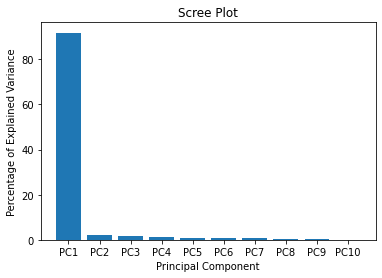

In [25]:
pcs_percentage_variation = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
pcs_labels = ['PC' + str(i) for i in range(1, len(pcs_percentage_variation) + 1)]

plt.bar(x=range(1, len(pcs_percentage_variation) + 1), height=pcs_percentage_variation, tick_label=pcs_labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

### PCA graph

Text(0, 0.5, 'PC2 - 2.2%')

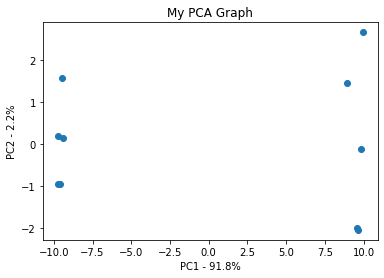

In [28]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=pcs_labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(pcs_percentage_variation[0]))
plt.ylabel('PC2 - {0}%'.format(pcs_percentage_variation[1]))


### Loading score (proportion/impact of each variable)

In [29]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

top_10_genes = sorted_loading_scores[0:10].index.values

loading_scores[top_10_genes]

gene28    0.104297
gene79    0.104294
gene62    0.104288
gene12   -0.104276
gene87   -0.104270
gene67    0.104269
gene8    -0.104252
gene20    0.104219
gene49   -0.104206
gene16    0.104203
dtype: float64